## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


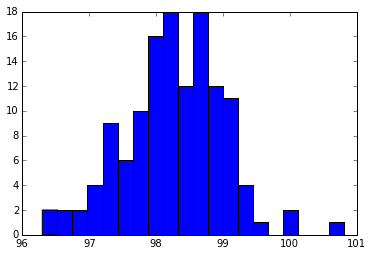

In [6]:
temp = df.temperature
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
n,bins,patches = plt.hist(temp,bins=20)
plt.show()

In [9]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [32]:
from scipy import stats
import math
print(stats.sem(temp))
se = stats.sem(temp)
t = math.sqrt(len(temp))
print(0.733183/t)

0.0643044168379
0.064304402977


Determine if the temperature data is normal distributed: I will apply the Shapiro Test for Normality

In [33]:
print(stats.shapiro(temp))

(0.9865769743919373, 0.2331680953502655)


The Shapiro Test p-value of 0.233 indicates that the body temperature sample is normal distributed. I follow this up with a Q-Q plot.

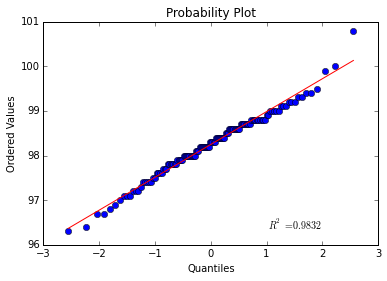

In [34]:
stats.probplot(temp, dist="norm", plot=plt)
plt.show()

The R-squared value of 0.9832 also suggests that the body temperature values are normal distributed.

The second question asks whether the population mean is truely 98.6: The samples of body temperature are normal distributed. Therefore I can apply the Z-Test. The standard error for the sample is 0.064 as calculated above. The sample mean is 98.249.

In [35]:
z = (98.249-98.6)/0.064
print('Z value: ', z)
pval = 2*(1-stats.norm.cdf(abs(z)))
print('p-value: ', pval)

('Z value: ', -5.484374999999986)
('p-value: ', 4.1493375402268384e-08)


According to the calculated p-value, which is smaller than 0.001 the hypothesis that the population mean is 98.6 degree has to be rejected.

In [37]:
# Compute alpha
alpha = 1-(95.0/100.0)
print(alpha)
# Critical probability
prob = 1-(alpha/2)
print(prob)
#Critical value for alpha = 0.05:
cv = 1.96
# Margin of error = critical value * standard error
moe = cv*se
print("Margin of error: ", moe)

0.05
0.975
('Margin of error: ', 0.12603665700226641)


In [39]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h
mean_temp, temp_ci1, temp_ci2 = mean_confidence_interval(temp)
print(round(temp_ci1, 2),round(mean_temp,2),round(temp_ci2,2))

(98.12, 98.25, 98.38)


In statistical terms an abnormal temperature would be lower than 98.12 degrees or higher than 98.38 degrees for this data set.

In [40]:
df_male = df.loc[df["gender"]=="M"]
df_female = df.loc[df["gender"]=="F"]
print(df_male.head())
print(df_female.head())

    temperature gender  heart_rate
2          97.8      M          73
5          99.2      M          83
6          98.0      M          71
7          98.8      M          78
12         98.2      M          72
   temperature gender  heart_rate
0         99.3      F          68
1         98.4      F          81
3         99.2      F          66
4         98.0      F          73
8         98.4      F          84


In [47]:
temp_m = df_male.temperature
temp_f = df_female.temperature
print("StDev for males: ",round(np.std(temp_m),2), "StDev for females: ",round(np.std(temp_f),2))
print("Mean body temperature - Male: ", round(np.mean(temp_m),2),"Mean body temperature - Female: ",round(np.mean(temp_f),2))
stats.ttest_ind(temp_m, temp_f, equal_var = False)

('StDev for males: ', 0.69, 'StDev for females: ', 0.74)
('Mean body temperature - Male: ', 98.1, 'Mean body temperature - Female: ', 98.39)


(-2.2854345381656112, 0.023938264182934196)

The mean body temperature of males and females is significantly different.